# Assignment 3
Alexandra Fink

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import MultinomialNB


## Problem 1 - Random Forest using Breast Cancer Wisconsin Dataset

In [211]:
#1.1 Download the dataset and load it as a dataframe
data = pd.read_csv("/Users/alexandrafink/Documents/GraduateSchool/Classes/ML Class/hw3_data/data.csv")
data.drop(data.filter(regex="Unnamed"),axis=1, inplace=True)
print(type(data))
print(data.head(2)) #examining data contents


<class 'pandas.core.frame.DataFrame'>
       id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  842302         M        17.99         10.38           122.8     1001.0   
1  842517         M        20.57         17.77           132.9     1326.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33            184.6      2019.0   
1  ...         24.99          23.41            158.8      1956.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   

   symmetry_worst  fractal_dimension_worst  
0   

In [212]:
#1.2 Identify the features and target column and print them
    #Target column -> Diagnosis (M = malignant, B = benign)
    #Features columns (n=30) -> radius, texture, perimeter, area, smoothness, compactness, concavity, \ 
    # concave poins, symmetry, fractal_dimenson - mean, se, worst for all

print(data.columns) #examining column names to identify features and target

target = data['diagnosis']
print(target)

features = data.drop(['id','diagnosis'], axis=1)
print(features)
feature_names = features.columns

print(type(features))


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     

In [213]:
#1.3 Split the dataset into train and test with test size=0.20.

train_data, test_data = train_test_split(data, test_size=0.2, random_state=25) 

1.4 Look at RandomForestClassifier class in scikit-learn. https://scikit-learn.org/ stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
Explain what it means to set n estimators=100,bootstrap=True, max features=’sqrt’.

Random forests are an ensemble of decision trees. Setting n_estimators to 100 means that in our random forest we are fitting 100 decision tree classifiers to our data. Bootstrap = True means that the data is being resampled for each estimator, so that each decision tree isn't modeled using the entire given dataset for each of the 100 estimators. Max_features = 'sqrt' means that when estimating the best split in a decision tree, the maximum amount of randomly selected features to consider for the split is the square root of the number of features. 

In [214]:
#1.5 Build a random forest classifier model using RandomForestClassifier class of scikit-learn on the train set. Use n estimators=100, bootstrap=True, and max features=’sqrt’.

forest = RandomForestClassifier(n_estimators = 100, bootstrap=True, max_features='sqrt') 
X_train = train_data.drop(['id','diagnosis'], axis=1)
y_train = train_data['diagnosis']
train_forest = forest.fit(X_train,y_train)


              precision    recall  f1-score     support
B              0.947368  0.960000  0.953642   75.000000
M              0.921053  0.897436  0.909091   39.000000
accuracy       0.938596  0.938596  0.938596    0.938596
macro avg      0.934211  0.928718  0.931367  114.000000
weighted avg   0.938366  0.938596  0.938401  114.000000
Accuracy Score: 0.9385964912280702
ROC AUC Score 0.9572649572649573


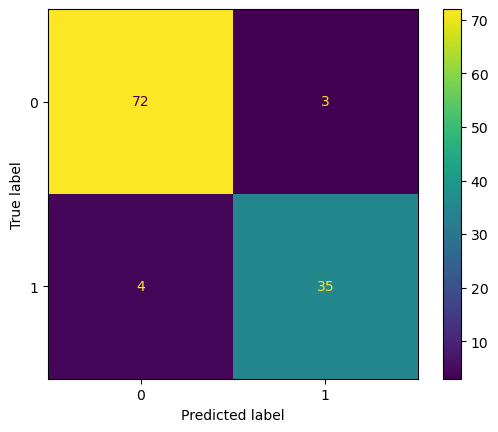

In [215]:
#1.6 Calculate and print the confusion matrix, classification score, accuracy score, and roc auc score using corresponding functions from sklearn.metrics on the test set.

#random forest on test set 
X_test = test_data.drop(['id','diagnosis'], axis=1)
y_test = test_data['diagnosis']
y_pred= forest.predict(X_test)


#confusion_matrix
confusion = metrics.confusion_matrix(y_test,y_pred)
metrics.ConfusionMatrixDisplay(confusion).plot()


#classification_score
print(pd.DataFrame(metrics.classification_report(y_test,y_pred, labels=np.unique(y_test),output_dict=True)).T)

#accuracy_score
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

#roc_auc_score
print('ROC AUC Score',metrics.roc_auc_score(y_test,forest.predict_proba(X_test)[:,1],labels=np.unique(y_test)))


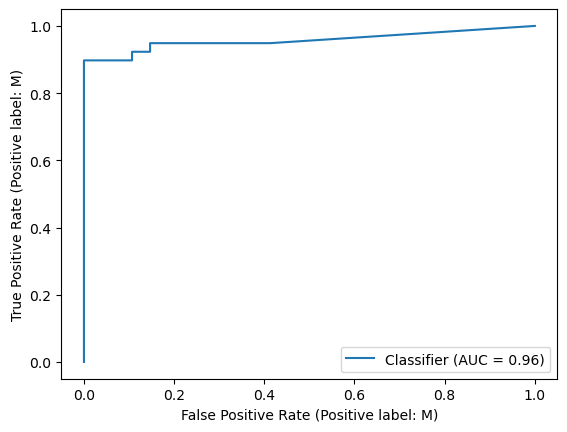

In [216]:
#1.7 Plot the ROC curve.

fpr_forest, tpr_forest, thresholds_forst = metrics.roc_curve(y_test,forest.predict_proba(X_test)[:,1], pos_label='M')

print(metrics.RocCurveDisplay.from_predictions(y_test,forest.predict_proba(X_test)[:,1], pos_label='M'))


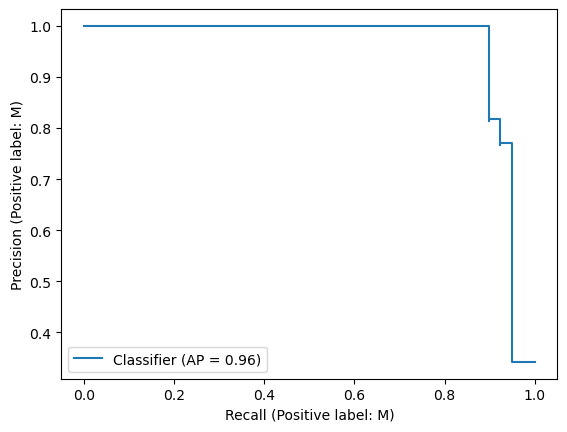

In [217]:
#1.8 Plot the Precision-Recall (PR) curve. In a PR curve x-axis is the recall and y-axis is the precision.

metrics.PrecisionRecallDisplay.from_predictions(y_test, forest.predict_proba(X_test)[:,1], pos_label='M')

perimeter_worst            0.142836
area_worst                 0.140376
concave points_mean        0.105627
radius_worst               0.098803
concave points_worst       0.093055
radius_mean                0.061207
perimeter_mean             0.060430
concavity_mean             0.049106
area_se                    0.037286
area_mean                  0.032909
compactness_worst          0.023367
texture_worst              0.022112
concavity_worst            0.019226
texture_mean               0.014970
smoothness_worst           0.011475
compactness_mean           0.010525
radius_se                  0.010479
symmetry_worst             0.009163
concave points_se          0.008652
smoothness_mean            0.007071
concavity_se               0.006045
smoothness_se              0.005436
fractal_dimension_se       0.004785
perimeter_se               0.004485
symmetry_mean              0.004393
texture_se                 0.004210
fractal_dimension_worst    0.004151
compactness_se             0

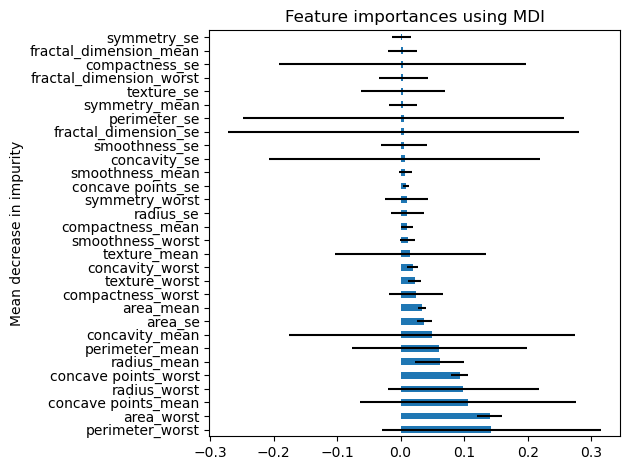

In [218]:
#1.9 Find important features and visualize them.
    #Use feature importances attribute of the classifier. Save feature importances as a Series with index being the feature name. Sort this series in descending order and print it.
    #Next visualize the feature importance scores. Create a bar plot with x-axis being feature importance score and y-axis being features.

#calculating feature importances
importances = forest.feature_importances_
forest_importances = pd.Series(importances, index=feature_names).sort_values(axis=0,ascending=False)
print(forest_importances)

#plotting feature importance scores
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.barh(xerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()



## Problem 2 - Comparing Classifier Performance

You have been asked to develop a classification model for diagnosing whether a patient is infected with a certain disease. To help you evaluate the models, your collaborator has provided you with a small test set (N = 10) with equal number of positive and negative examples. You applied two classifiers, C1 and C2. The outputs of the classifiers in terms of predicting whether each of the test examples belong to the “positive” class are summarized in the table shown in Figure 1. The first row shows the probability a test example belongs to the positive class according to classifier C1, while the second row shows the same information for classifier C2. The last row indicates the true class label of the 10 test examples.



Text(0.5, 1.0, 'Problem 2.1 ROC Curves')

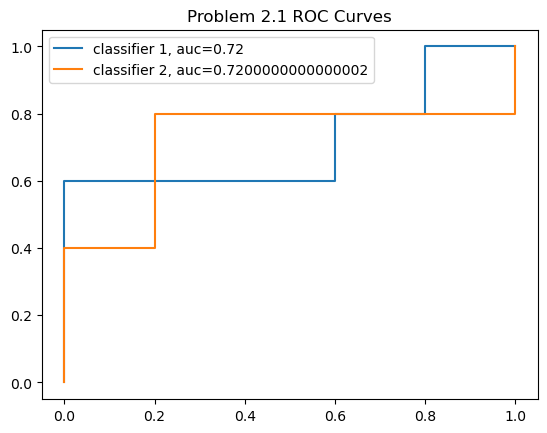

In [219]:
#2.1 Draw the corresponding ROC curves for both classifiers on the same plot. You are allowed to use scikit-learn for this.

#true values for test data
y_test = np.array([0,0,1,0,1,0,0,1,1,1])

#probabilities of classifying positive for c1 and c2
c1_prob = np.array([0.5, 0.2, 0.25, 0.37, 0.41, 0.55, 0.65, 0.8, 0.92, 0.99])
c2_prob = np.array([0.33, 0.22, 0.1, 0.41, 0.68, 0.59, 0.72, 0.75, 0.64, 0.95])

#calculating roc
c1_fpr, c1_tpr, c1_thresholds = metrics.roc_curve(y_test, c1_prob)
c2_fpr, c2_tpr, c2_thresholds = metrics.roc_curve(y_test, c2_prob)
c1_auc = metrics.roc_auc_score(y_test, c1_prob)
c2_auc = metrics.roc_auc_score(y_test, c2_prob)

#begin plotting
plt.figure(0).clf()
plt.plot(c1_fpr,c1_tpr,label="classifier 1, auc="+str(c1_auc))
plt.plot(c2_fpr,c2_tpr,label="classifier 2, auc="+str(c2_auc))
plt.legend(loc=0)
plt.title('Problem 2.1 ROC Curves')


Optimal threshold for c1 classifier is 0.6
Optimal threshold for c2 classifier is 0.6000000000000001
Accuracy of classifiers: 0.7 0.8
F1 Score of classifiers: 0.6666666666666665 0.8000000000000002
              precision  recall  f1-score  support
0              0.666667     0.8  0.727273      5.0
1              0.750000     0.6  0.666667      5.0
accuracy       0.700000     0.7  0.700000      0.7
macro avg      0.708333     0.7  0.696970     10.0
weighted avg   0.708333     0.7  0.696970     10.0
              precision  recall  f1-score  support
0                   0.8     0.8       0.8      5.0
1                   0.8     0.8       0.8      5.0
accuracy            0.8     0.8       0.8      0.8
macro avg           0.8     0.8       0.8     10.0
weighted avg        0.8     0.8       0.8     10.0


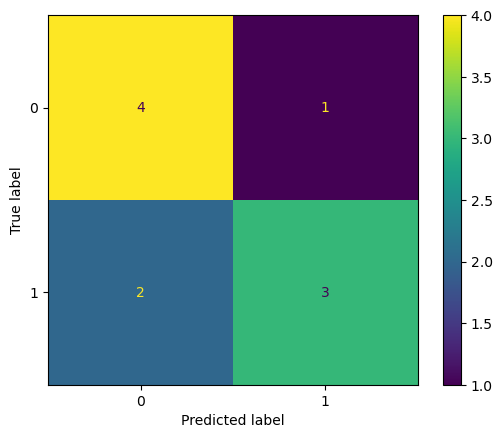

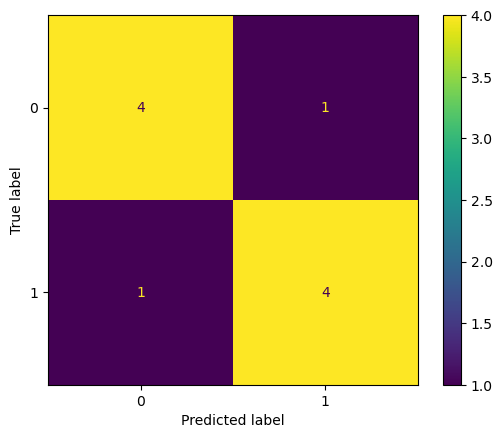

In [220]:
# 2.2 For each classifier Ci, i = 1,2, what is the optimal threshold we should use for P(y = +|Ci) to obtain a high true positive rate and low false positive rate? 
#Draw the confusion matrix associated with each classifier (using the selected optimal threshold for predicting positive class). 
#Based on your results, which classifier is better in terms of (a) accuracy, and (b) F-measure?

#Optimal thresholds calculated from the point of maximum difference between the true positive rates and false positive rates for c1 and c2, shown above in 2.1. 
    #c1_prob > thresh = 1; c1_prob < thresh = 0
    #c2_prob > thresh = 1; c2_prob < thresh = 0

c1_optim_thresh = np.amax(np.subtract(np.array(c1_tpr),np.array(c1_fpr)))
c2_optim_thresh = np.amax(np.subtract(np.array(c2_tpr),np.array(c2_fpr)))

#c1 threshold set to 0.6 and c2 threshold set to 0.6000000000000001.
print('Optimal threshold for c1 classifier is', c1_optim_thresh)
print('Optimal threshold for c2 classifier is',c2_optim_thresh)



#generating classifier predictions based on optimal threshold
c1_pred = (c1_prob > c1_optim_thresh).astype(int)
c2_pred = (c2_prob > c2_optim_thresh).astype(int)


#confusion matrix c1
confusion_c1 = metrics.confusion_matrix(y_test,c1_pred)
metrics.ConfusionMatrixDisplay(confusion_c1).plot()

#confusion matrix c2
confusion_c2 = metrics.confusion_matrix(y_test,c2_pred)
metrics.ConfusionMatrixDisplay(confusion_c2).plot()

#accuracy = (tp + tn) / (tp + fp + fn + tn)

c1_accuracy = metrics.accuracy_score(y_test,c1_pred)
c2_accuracy = metrics.accuracy_score(y_test,c2_pred)

#f1 score = harmonic mean of precision & recall
c1_f1 = metrics.f1_score(y_test,c1_pred)
c2_f1 = metrics.f1_score(y_test,c2_pred)

print('Accuracy of classifiers:',c1_accuracy,c2_accuracy)
print('F1 Score of classifiers:',c1_f1,c2_f1)

print(pd.DataFrame(metrics.classification_report(y_test,c1_pred,output_dict=True)).T)
print(pd.DataFrame(metrics.classification_report(y_test,c2_pred,output_dict=True)).T)


# (a) classifier c2 is better in terms of accuracty (0.8>0.7)
# (b) classifier c2 is better in terms of f1 score (0.8>0.6666)

In [221]:
#2.3 Compute the area under ROC curve for each classifier. Which classifier has a larger area under the ROC curve? You are allowed to use scikit-learn for this.

c1_auc = metrics.roc_auc_score(y_test, c1_prob)
c2_auc = metrics.roc_auc_score(y_test, c2_prob)

print('ROC AUC for c1 classifier',c1_auc)
print('ROC AUC for c2 classifier',c2_auc)

#Classifier c2 has a very slightly larger ROC AUC (0.7200000000000002 > 0.72)

ROC AUC for c1 classifier 0.72
ROC AUC for c2 classifier 0.7200000000000002


## Problem 3 - kNN using Hepatitis Dataset

3.1 Look at KNeighborsClassifier class in scikit-learn. https://scikit-learn.org/stable/ modules/generated/sklearn.neighbors.KNeighborsClassifier.html What does hyper- parameters n neighbors and metric correspond to?

The n_neighbors parameter corresponds to the number of 'neighbors' to include in each neighborhood. The neighbors, or data points, are considered to be in a neighborhood, or belonging to the same class, based on their proximity. The metric parameter is the metric used to calculate the distance between points to determine whether they are similar enough to be considered in the same neighborhood. The default is the minkowski distance metric (euclidean distance when p=2)


Text(0.5, 1.0, 'Generalization Performance of kNN Classifiers')

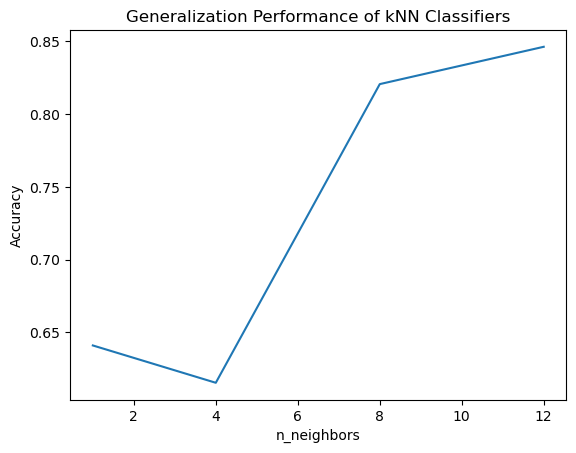

In [222]:
#3.2 Build 4 different kNN classifier using KNeighborsClassifier class in scikit-learn with n neighbors=1, 4, 8, 12. 
    #Plot the generalization performance of these 4 models on the test set as a function of n neighbors.

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data'
hep_data = pd.read_csv(url, header=None)
hep_data.columns = ['class','age','sex','steroid','antivirals','fatigue','malaise','anorexia','liver_big', \
             'liver_firm','spleen_palp','spiders','ascites','varices','bilirubin','alk_phos','sgot','albumin','protime','histology']

#info from hepatitis.names: attributes 9,10,16,18,19 have lots of missing data pts (range 10 to 67)
#info from hepatitis.names: attributes 4,6,7,8,11,12,13,14,15,17 have < 10 missing values
impute_cols = hep_data.columns[[4,6,7,8,11,12,13,14,15,17]]

#removing these attributes from further analysis
rm_cols = list(hep_data.columns[[9,10,16,18,19]])
hep_data = hep_data.drop(columns=rm_cols, axis=1)
new_cols = hep_data.columns

#Handing missing data from remaining data via imputation. 
imputer = SimpleImputer(missing_values='?',strategy='most_frequent')
hep_data = pd.DataFrame(imputer.fit_transform(hep_data))
hep_data.columns = list(new_cols)


#start kNNs

#splitting data into train/test sets
X_train_hep, X_test_hep, y_train_hep, y_test_hep = train_test_split(hep_data.drop(['class'], axis=1), hep_data['class'], random_state=25) 

test_accuracy = []

neighbors_list = [1, 4, 8, 12]

for n_neighbors in neighbors_list:
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier.fit(X_train_hep,y_train_hep.astype(int))
    test_accuracy.append(classifier.score(X_test_hep,y_test_hep.astype(int)))


plt.plot(neighbors_list, test_accuracy)
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.title('Generalization Performance of kNN Classifiers')

## Problem 4 - Naive Bayes Classifier

Consider the following training set for predicting whether there is traffic congestion in the morning on a highway for a particular day. There are 100 examples in the training set, with 40% positive (congestion) and 60% negative (no congestion) examples.

In [224]:
#4.1 Compute the class conditional probabilities P(accident=yes|+), P(accident=yes|-), P(weather=good|+), P(weather=good|-), P(construction=yes|+), and P(construction=yes|-).

prob_cong = 0.4
prob_notcong = 0.6

accident = np.array([0,0,1,1,1])
weather = np.array([1,1,1,0,0])
construction = np.array([0,1,0,0,1])

pos_train = np.array([5,10,10,10,5])
neg_train = np.array([30,20,5,5,0])

cong_total = sum(pos_train)
nocong_total = sum(neg_train)

#P(accident=yes|+)
accident_cong = sum(pos_train[accident.astype(bool)])
p_accident_cong = accident_cong.astype('float')/cong_total
print('P(accident=yes|+)',p_accident_cong)

#P(accident=yes|-)
accident_nocong = sum(neg_train[accident.astype(bool)])
p_accident_nocong = accident_nocong/nocong_total
print('P(accident=yes|-)',p_accident_nocong)

#P(weather=good|+)
weather_cong = sum(pos_train[weather.astype(bool)])
p_weather_cong = weather_cong/cong_total
print('P(weather=good|+)',p_weather_cong)

#P(weather=good|-)
weather_nocong = sum(neg_train[weather.astype(bool)])
p_weather_nocong = weather_nocong/nocong_total
print('P(weather=good|-)',p_weather_nocong)

#P(construction=yes|+)
construction_cong = sum(pos_train[construction.astype(bool)])
p_construction_cong = construction_cong/cong_total
print('P(construction=yes|+)',p_construction_cong)

#P(construction=yes|-)
construction_nocong = sum(neg_train[construction.astype(bool)])
p_construction_nocong = construction_nocong/nocong_total
print('P(construction=yes|-)',p_construction_nocong)


P(accident=yes|+) 0.625
P(accident=yes|-) 0.16666666666666666
P(weather=good|+) 0.625
P(weather=good|-) 0.9166666666666666
P(construction=yes|+) 0.375
P(construction=yes|-) 0.3333333333333333


In [208]:
#4.2 Use the class conditional probabilities given in the previous question to predict the class label of a test example with the following feature set: (Accident = no, weather = bad, construction = yes) by applying the naıve Bayes classifier.

#using calculations above to generate training set
X_bayes_train = np.stack(np.array([[accident_cong,weather_cong,construction_cong],[accident_nocong,weather_nocong,construction_nocong]]))
y_bayes_train = np.array([1,0])

mnb = MultinomialNB()
mnb.fit(X_bayes_train, y_bayes_train)

#generating test set
#P(accident=no|+)
noaccident_cong = sum(pos_train[~accident.astype(bool)])
p_noaccident_cong = noaccident_cong.astype('float')/cong_total

#P(accident=no|-)
noaccident_nocong = sum(neg_train[~accident.astype(bool)])
p_noaccident_nocong = noaccident_nocong/nocong_total

#P(weather=no|+)
noweather_cong = sum(pos_train[~weather.astype(bool)])
p_noweather_cong = noweather_cong/cong_total

#P(weather=no|-)
noweather_nocong = sum(neg_train[~weather.astype(bool)])
p_noweather_nocong = noweather_nocong/nocong_total

X_bayes_test = np.stack(np.array([[noaccident_cong,noweather_cong,construction_cong],[noaccident_nocong,noweather_nocong,construction_nocong]]))

print(mnb.predict(X_bayes_test))

#Naive Bayes classifier determines that test example belongs to class 1 (congestion)


[1 1]
